<function matplotlib.pyplot.show(close=None, block=None)>

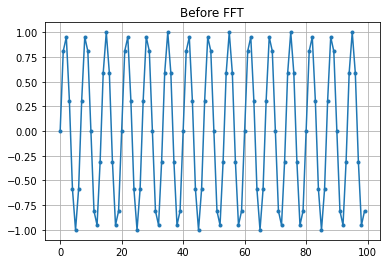

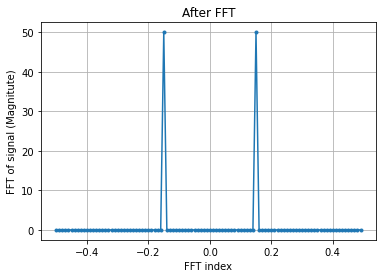

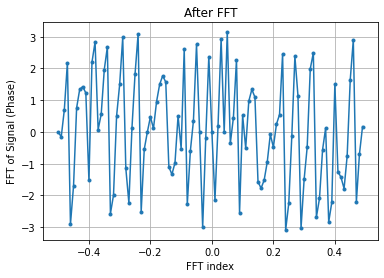

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# This demonstrates a sine wave with 0.15Hz over a sample rate of 1 Hz over a simulation of 100 points. 
# The amplitude in magnitude graph happens at .15HZ indicating it was a real signal. 
# Overall showing we can convert a source into the frequency dimension/Domain
# magnitude would be 1 hertz from -0.5 -> 0.5
# amplitude is the height
# phase would be the different max and min and changes 
# windowing to have the signal go to be zeroing

Fs = 1 #Hz Considered our Hertz and our sample rate
N = 100 #number of points to simulate as well as our Fast Forier Transform Size
#s = s * np.hamming(N) #Used specifically for windowing 

t = np.arange(N) #Order 1->100
s = np.sin(0.15*2*np.pi*t) #The example sinewave
#s = np.sin(3.427866*2*np.pi*t) # random equation added
plt.figure(2)
plt.plot(t, s, ".-")
plt.title("Before FFT")
plt.grid(True)

S = np.fft.fftshift(np.fft.fft(s)) #This causes use to put 0 in the middle to be able to calculate from neg to pos freq
S_mag = np.abs(S) # will get the absolute (used for magnitude)
S_phase = np.angle(S) # compute the angle of complex numbers in radian(imaginary number causes this use)
f = np.arange(Fs/-2, Fs/2, Fs/N) # Get the min and max for the length charts


plt.figure(0)
plt.plot(f, S_mag, '.-')
plt.title("After FFT")
plt.ylabel("FFT of signal (Magnitute)")
plt.xlabel("FFT index")
plt.grid(True)

plt.figure(1)
plt.plot(f,S_phase,'.-')
plt.title("After FFT")
plt.ylabel("FFT of Signal (Phase)")
plt.xlabel("FFT index")
plt.grid(True)

plt.show



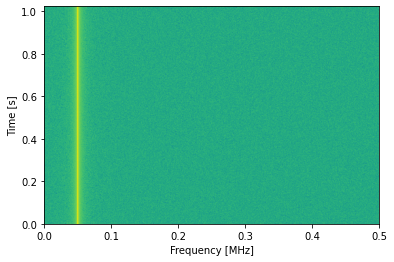

In [111]:
#import numpy as np
#import matplotlib.pyplot as plt

# Creating a spectrogram
# A spectrogram is just FFT stack on FFT. 

sample_rate = 1e6 #megahertz

# Generate tone plus noise
t = np.arange(1024*1000)/sample_rate # time vector
f = 50e3 # freq of tone <- frequency mocking a jump if we had witin a live spectrum analyzer
x = np.sin(2*np.pi*f*t) + 0.2*np.random.randn(len(t)) #represent the noise in the background (sinewave)

fft_size = 1024
num_rows = int(np.floor(len(x)/fft_size))
spectrogram = np.zeros((num_rows, fft_size))

#display noise that we is shown. This is done by shifting and abs for magnitude. log is for power, x is where the frequency
#occured
for i in range(num_rows):
        spectrogram[i,:] = 10*np.log10(np.abs(np.fft.fftshift(np.fft.fft((x)[i*fft_size:(i+1)*fft_size])))**2) 
spectrogram = spectrogram[:,fft_size//2:] # get rid of negative freqs because we simulated a real signal

#extent gets length and width the equations is to break down the time and frequency to show correct numbers on X & Y axis
plt.imshow(spectrogram, aspect='auto', extent = [0, sample_rate/2/1e6, 0, len(x)/sample_rate]) 
plt.xlabel("Frequency [MHz]")
plt.ylabel("Time [s]")
plt.show()
